<a href="https://colab.research.google.com/github/jhonda18/Python2/blob/main/N5_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b>Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 3 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import matplotlib.dates as dates

# **SERIES DE TIEMPO**

Para desarrollar esta clase vamos a usar un conjunto de datos bastante grande, de cual podemos ver su descripción [aquí](https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd)

> The New York City Fire Department keeps a log of detailed information on incidents handled by FDNY units. In this project we will work with a dataset that contains a record of incidents handled by FDNY units from Jan 2013-Jun 2018.

```python
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.dates as dates
import pickle

#CONJUNTO DE DATOS MUY GRANDE 
PATH = "https://data.cityofnewyork.us/resource/tm6d-hbzd.json?$limit=3000000"
DATASET= pd.read_json(PATH)
total_incidents = DATASET.shape[0]
print("The total incidents is:", total_incidents)
data_dev = DATASET.iloc[:,[0,1,2,3,4]]
data_dev.columns = [ c.upper() for c in data_dev.columns] 
data_dev['INCIDENT_DATE_TIME'] = pd.to_datetime(data_dev['INCIDENT_DATE_TIME'])

test_data = data_dev[data_dev['INCIDENT_DATE_TIME'].dt.year==2018]
select = [data_dev['INCIDENT_DATE_TIME'].dt.year==i for i in range(2013,2018)]
train_data = data_dev[np.any(select,axis=0)] 
tsTrain_m = train_data.groupby([data_dev['INCIDENT_DATE_TIME'].dt.year,
                                     data_dev['INCIDENT_DATE_TIME'].dt.month]).count()['IM_INCIDENT_KEY']

tsTest_m = test_data.groupby([data_dev['INCIDENT_DATE_TIME'].dt.year,
                                   data_dev['INCIDENT_DATE_TIME'].dt.month]).count()['IM_INCIDENT_KEY']

delta = relativedelta(months=1)
init = datetime(2013,1,1)
end1 = datetime(2018,1,1)
end2 = datetime(2018,7,1)
r = relativedelta(end1, init)
N = r.months + (12*r.years)
tTrain_m = np.array([init + i*delta for i in range(0,N)])
r = relativedelta(end2, end1)
N = r.months + (12*r.years)
tTest_m = np.array([end1 + i*delta for i in range(0,N)])

ytrain_m      = tsTrain_m.values
ytest_m       = tsTest_m.values

train =pd.DataFrame({"time": tTrain_m ,"count":ytrain_m})
train.to_csv('trainFDNY.csv',index=False)
test = pd.DataFrame({"time": tTest_m ,"count":ytest_m})
test.to_csv('testFDNY.csv',index=False)

with open("train.pkl", 'wb') as f:
    pickle.dump(train, f)
with open("test.pkl", 'wb') as f:
    pickle.dump(test, f)
```

In [ ]:
#@title Código oculto
"""
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.dates as dates
import pickle

#CONJUNTO DE DATOS MUY GRANDE 
PATH = "https://data.cityofnewyork.us/resource/tm6d-hbzd.json?$limit=3000000"
DATASET= pd.read_json(PATH)
total_incidents = DATASET.shape[0]
print("The total incidents is:", total_incidents)
data_dev = DATASET.iloc[:,[0,1,2,3,4]]
data_dev.columns = [ c.upper() for c in data_dev.columns] 
data_dev['INCIDENT_DATE_TIME'] = pd.to_datetime(data_dev['INCIDENT_DATE_TIME'])

test_data = data_dev[data_dev['INCIDENT_DATE_TIME'].dt.year==2018]
select = [data_dev['INCIDENT_DATE_TIME'].dt.year==i for i in range(2013,2018)]
train_data = data_dev[np.any(select,axis=0)] 
tsTrain_m = train_data.groupby([data_dev['INCIDENT_DATE_TIME'].dt.year,
                                     data_dev['INCIDENT_DATE_TIME'].dt.month]).count()['IM_INCIDENT_KEY']

tsTest_m = test_data.groupby([data_dev['INCIDENT_DATE_TIME'].dt.year,
                                   data_dev['INCIDENT_DATE_TIME'].dt.month]).count()['IM_INCIDENT_KEY']

delta = relativedelta(months=1)
init = datetime(2013,1,1)
end1 = datetime(2018,1,1)
end2 = datetime(2018,7,1)
r = relativedelta(end1, init)
N = r.months + (12*r.years)
tTrain_m = np.array([init + i*delta for i in range(0,N)])
r = relativedelta(end2, end1)
N = r.months + (12*r.years)
tTest_m = np.array([end1 + i*delta for i in range(0,N)])

ytrain_m      = tsTrain_m.values
ytest_m       = tsTest_m.values

train =pd.DataFrame({"time": tTrain_m ,"count":ytrain_m})
train.to_csv('trainFDNY.csv',index=False)
test = pd.DataFrame({"time": tTest_m ,"count":ytest_m})
test.to_csv('testFDNY.csv',index=False)

with open("train.pkl", 'wb') as f:
    pickle.dump(train, f)
with open("test.pkl", 'wb') as f:
    pickle.dump(test, f)
"""
print()

In [ ]:
path = 'https://raw.githubusercontent.com/sherphys/UdeA/master/trainFDNY.csv'
train_csv = pd.read_csv(path,index_col='time',parse_dates=['time'])
train_csv.head()

,count
time,
2013-01-01,35254
2013-02-01,30195
2013-03-01,31614
2013-04-01,31031
2013-05-01,34705


In [ ]:
path = 'https://raw.githubusercontent.com/sherphys/UdeA/master/testFDNY.csv'
test_csv = pd.read_csv(path,index_col='time',parse_dates=['time'])
test_csv.head()

,count
time,
2018-01-01,49101
2018-02-01,34511
2018-03-01,41291
2018-04-01,35903
2018-05-01,40196


## Series de tiempo planeación y objetivos 

$$y(t) \rightarrow y_t,t \in [0,n]$$

In [ ]:
ytrain_m = train_csv.values
tTrain_m = train_csv.index.values
ytest_m = test_csv.values
tTest_m = test_csv.index.values

ymax_m        = ytrain_m.max()
norm_ytrain_m = ytrain_m/ymax_m
norm_ytest_m  = ytest_m/ymax_m

In [ ]:
def timeserie_plot(t1,y1,t2,y2,name_time,training=True):
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    ax.plot_date(t1,y1,"b--",label="Train data")
    #ax.xaxis --> objeto que controla los ejes x
    #set_major_locator --> metodo para ubicar generar las xticks
    #dates.MonthLocator --> Crear un rango para usar en matplolib
    ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,7),interval=1))
    plt.title("Incidents numbers vs "+name_time)
    if training:
      plt.plot([t1[-1],t2[0]],[y1[-1],y2[0]],"r--")
      
      #set_major_formatter --> metodo para formatear las xticks
      #dates.DateFomatter %b --> Mes %Y año 
      ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
      
      plt.plot(t2,y2,"r--",label='Test data')
      plt.legend(loc='upper left')
    
    plt.grid()
    plt.show()

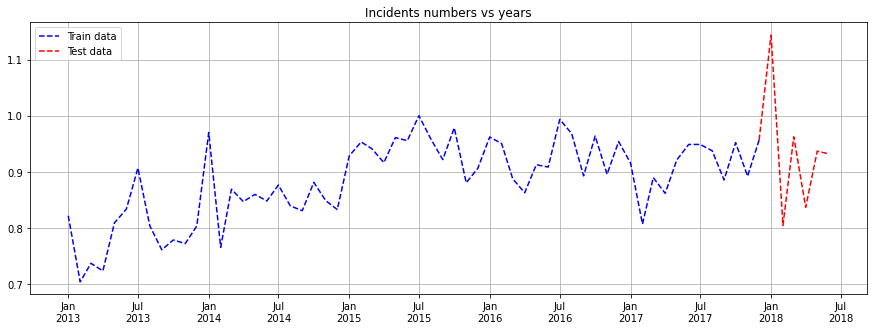

In [ ]:
timeserie_plot(tTrain_m,norm_ytrain_m,tTest_m,norm_ytest_m,'years')

In [ ]:
def mean_std_plot(t,y,means,stds,window,name_time):
    
    norm_mean = y.mean()
    norm_std =  y.std()
    means_ytrain = y.rolling(window=window,min_periods=1).mean().values
    stds_ytrain  = y.rolling(window=window,min_periods=1).std().values

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    plt.subplots_adjust(hspace=0.4)
    fig.set_figwidth(15)
    fig.set_figheight(15)
    
    ax1.set_title('Train data mean and std (all data)')
    ax1.plot(t,y,"b",lw=1)    
    ax1.axhline(norm_mean,color='r',lw=2)
    ax1.axhline(norm_mean + norm_std,c='k',lw=2,ls='--')
    ax1.axhline(norm_mean - norm_std,c='k',lw=2,ls='--')
   
    
    ax2.set_title('Train data mean and std (for %s)'%(name_time))
    ax2.plot(t,y,"b",lw=1)
    ax2.plot(t,means,color='r',lw=2)
    ax2.plot(t,means+stds,color='k',lw=2,ls='--')
    ax2.plot(t,means-stds,color='k',lw=2,ls='--')
 
    
    ax3.set_title('Train data mean and std (for %s using smooth)'%(name_time))
    ax3.plot(t,y,"b",lw=1)
    ax3.plot(t,means_ytrain,color='r',lw=2)
    ax3.plot(t,means_ytrain+stds_ytrain,color='k',lw=2,ls='--')
    ax3.plot(t,means_ytrain-stds_ytrain,color='k',lw=2,ls='--')
    
    [ax.grid() for ax in (ax1,ax2,ax3)]
    [ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,7),interval=1))for ax in (ax1,ax2,ax3)]
    [ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) for ax in (ax1,ax2,ax3)]

    
#means = np.repeat(train_csv.mean(level=0).values,12)
#stds = np.repeat(train_csv.std(level=0).values,12)

In [ ]:
#mean_std_plot(train_csv.index.values,train_csv.iloc[:,0],means,stds,12,'year')

## Stacionary tests

There are various tests to check for the existence of a unit root, some of them are given by:

* The Dickey–Fuller test (DF) or augmented Dickey–Fuller (ADF) tests
* Testing the significance of more than one coefficients (f-test)
* The Phillips–Perron test (PP)
* KPSS test (in which the null hypothesis is trend stationarity rather than the presence of a unit root)
* Dickey Pantula test

 Augmented Dickey-Fuller test

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf(y,lags):
  adftest = adfuller(y)
  adf_output = pd.Series(adftest[0:2],index=['ADF stats','p-value'])
  names = list(adftest[4].keys())
  names = sorted(names, key = lambda x:int(x.split('%')[0]))
  reject = {'p-value':adf_output['p-value']<0.05}
  for key in names:
    value = adftest[4][key]
    adf_output[f'Critical Values {key}'] = "{:3f}".format(value)
    reject[key] = adftest[0]<value
  print("Result ADF test".center(50,'*'))
  print(adf_output)
  result_test(reject)
  print('')

def result_test(reject):
  r = reject.copy()
  print('Analysis test'.center(50,'*'))
  if r['p-value']:
    print('The p-value of test has a significance level of less than 5%')
    del r['p-value']
  else:
    print('The p-value of test does not have a good significance level')
    return
  
  for k,v in r.items():
    if v:
      print('We can reject $H_0$ with significance level of %s'%k)

In [ ]:
adf(ytrain_m.ravel(),12)

*****************Result ADF test******************
ADF stats               -2.87471
p-value                0.0483689
Critical Values 1%     -3.548494
Critical Values 5%     -2.912837
Critical Values 10%    -2.594129
dtype: object
******************Analysis test*******************
The p-value of test has a significance level of less than 5%
We can reject $H_0$ with significance level of 10%



 KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

* Null Hypothesis (H0): The process is trend stationary.
*Alternate Hypothesis (H1): The series has a unit root (series is not stationary).




In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_res(y,lags):
  print('Results KPSS test'.center(50,'*'))
  kpsstest = kpss(y, regression='ct', lags=lags)
  kpss_output = pd.Series(kpsstest[0:3], index=['KPPS  Statistic','p-value','Lags Used'])
  names = list(kpsstest[3].keys())
  names = sorted(names, key=lambda x: float(x.split('%')[0]))
  reject= {'p-value':kpss_output['p-value']<0.05}
  for key in names:
      value = kpsstest[3][key]
      kpss_output['Critical Value (%s)'%key] = "{:.3f}".format(value)
      reject[key] = kpsstest[0]>value
  print(kpss_output)
  result_test(reject)

kpss_res(ytrain_m.ravel(),lags=12)

****************Results KPSS test*****************
KPPS  Statistic           0.147462
p-value                  0.0487813
Lags Used                       12
Critical Value (1%)          0.216
Critical Value (2.5%)        0.176
Critical Value (5%)          0.146
Critical Value (10%)         0.119
dtype: object
******************Analysis test*******************
The p-value of test has a significance level of less than 5%
We can reject $H_0$ with significance level of 5%
We can reject $H_0$ with significance level of 10%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  


* Case 1
1. ADF test: you can’t reject H0​ 
2. KPSS test: reject H0​. 

Both imply that series has unit root.

* Case 2 
1. ADF test: Reject H0​.
2. KPSS test: don't reject H0​.   

Both imply that series is stationary. 

* Case 3 If we can’t reject both test.
Data give not enough observations.The serie can be I(0) (absence of unit root) and nonstationary at the same time. That is because there are many forms of nonstationarity. 

* Case 4 If we can reject both test.
Heteroskedasticity in a series may make a big difference; if there is structural break it will affect inference.

![](https://otexts.com/fpp2/fpp_files/figure-html/beeracf-1.png)

![](https://otexts.com/fpp2/fpp_files/figure-html/aelec-1.png)

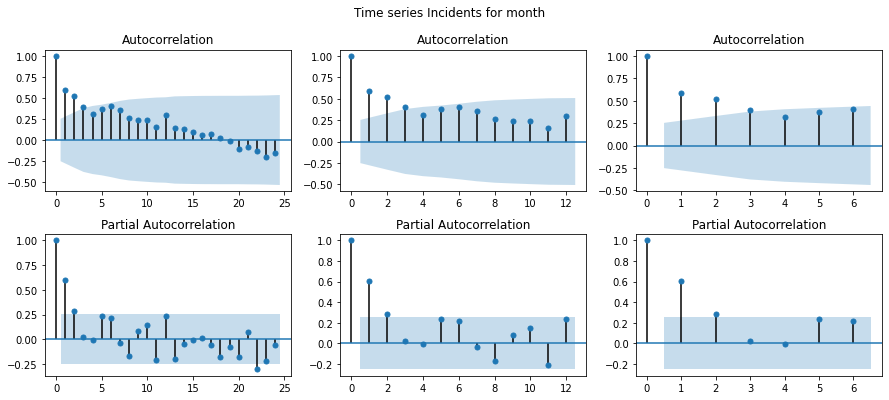

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axs = plt.subplots(2, 3)
plt.suptitle('Time series Incidents for month')
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(15)
fig.set_figheight(6)
lags = [24,12,6]
for i in range(0,3):
    plot_acf(ytrain_m,axs[0][i],lags=lags[i])   
    plot_pacf(ytrain_m,axs[1][i],lags=lags[i])   
plt.show()

In [ ]:
#Shift --> estacionalidad ventaneo !=1 cada s periodos (freq) hay un patron
yadjust_m = train_csv.diff(12).dropna().values

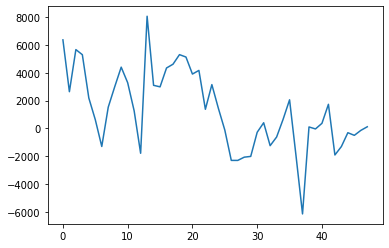

In [ ]:
plt.plot(yadjust_m)

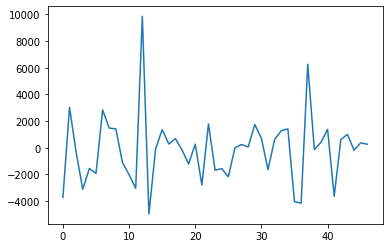

In [ ]:
#Tendencia lineal aplica primera derivada shift 1
plt.plot(yadjust_m[1:] - yadjust_m[:-1])
yadjust_detrend_m = yadjust_m[1:] - yadjust_m[:-1]

* Estacional s = 12
* Derivada = 1
* Tendecia = lineal 

In [ ]:
adf(yadjust_m.ravel(), 12)

*****************Result ADF test******************
ADF stats               -3.76966
p-value                0.0032334
Critical Values 1%     -3.577848
Critical Values 5%     -2.925338
Critical Values 10%    -2.600774
dtype: object
******************Analysis test*******************
The p-value of test has a significance level of less than 5%
We can reject $H_0$ with significance level of 1%
We can reject $H_0$ with significance level of 5%
We can reject $H_0$ with significance level of 10%



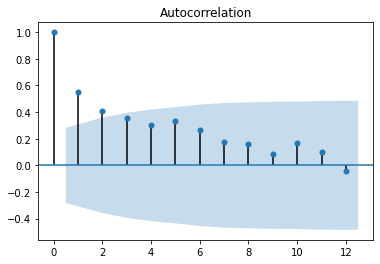

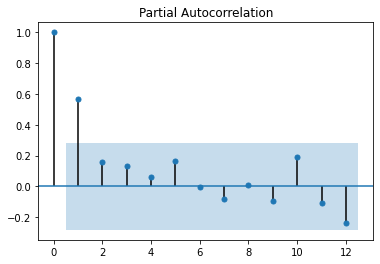

In [ ]:
plot_acf(yadjust_m,lags=12) 
plot_pacf(yadjust_m,lags=12) 
plt.show()

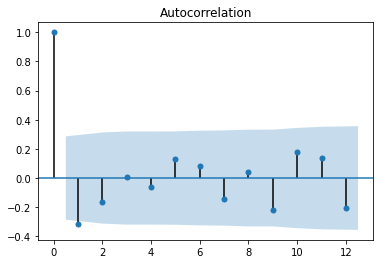

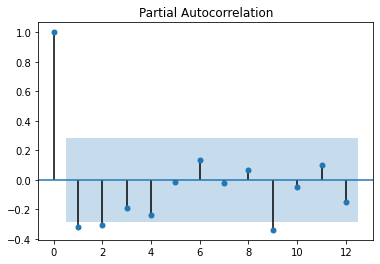

In [ ]:
plot_acf(yadjust_detrend_m ,lags=12) 
plot_pacf(yadjust_detrend_m ,lags=12) 
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL

def SD_plots(df,f,type_sd='additive'):
    
    #Decomposition 
    result = seasonal_decompose(df,freq=f, model=type_sd, extrapolate_trend='freq')
        
    fig = result.plot()
    fig.subplots_adjust(hspace=0.5)
    fig.set_figwidth(15)
    fig.set_figheight(10)
    fig.suptitle('Seasonal decompose (%s)'%type_sd, fontsize=22)
    axs = fig.axes
    for ax in axs:
        ax.grid()
    axs[0].ticklabel_format(axis='y',style='sci',scilimits=(4,4))
    axs[1].ticklabel_format(axis='y',style='sci',scilimits=(4,4))
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,2))
    plot_acf(result.resid,ax=ax1)
    ax2.grid()
    ax2.set_title('Mean %f'%(result.resid.mean()))
    sns.distplot(result.resid,bins=20, hist_kws={"rwidth":0.75},hist = True,ax=ax2)
    plt.show()
    return result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


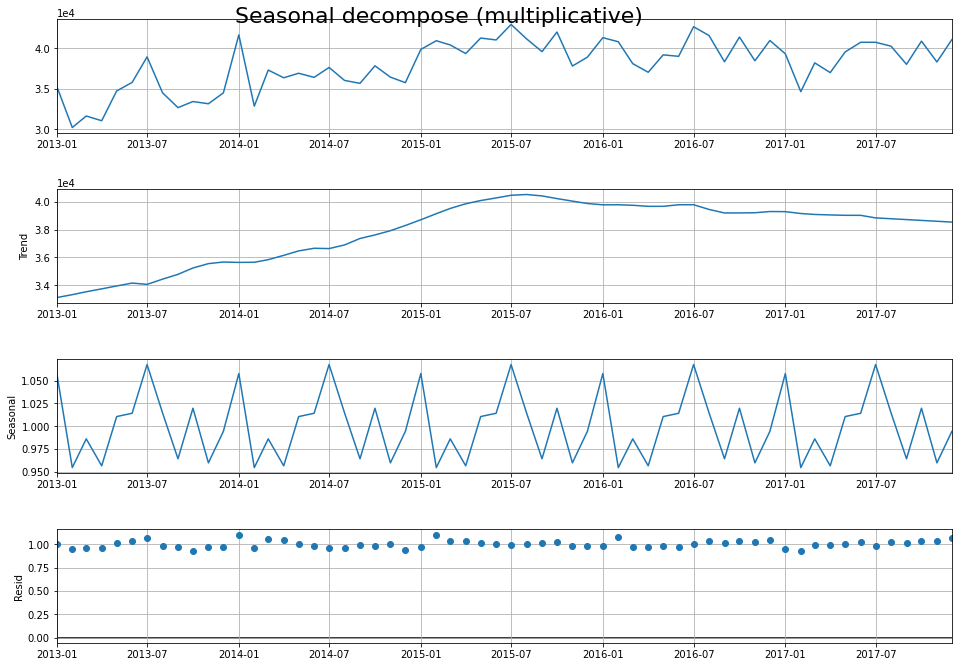

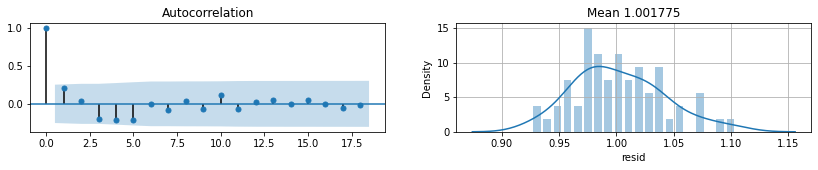

In [ ]:
SD_plots(train_csv,12, type_sd = 'multiplicative')

# **MODELOS ARIMA**

## Prediting sales

In this example, we use the dataset from a Kaggle competition (https://www.kaggle.com/c/demand-forecasting-kernels-only). It represents the daily sales for each store and item.

## Use of ARIMA models or supervised models

In order to create a forecast model first, we must identify the data behavior over time. If data shows trend and seasonality we can build a time series model but only whether we have a stationary data set. On the other hand, if data don't show a defined trend we must use a supervised model as Random forest, LSTM, etc, in which we must create features that help us to predict our target variable

## Intalalling and importing libraries

For thir analysis we are going to implement LSTM neural networks through keras

In [ ]:
#!pip install --upgrade setuptools

In [ ]:
#!pip install plotly

In [ ]:
#installing the time series analysis package
!pip install pmdarima

In [ ]:
#!pip install arch

In [ ]:
#general libraries
import os
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
from __future__ import division

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller

In [ ]:
#visualization
import matplotlib.pyplot as plt
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


In [ ]:
#machine learning libraries
from sklearn.preprocessing import MinMaxScaler
import pmdarima as pm
from pmdarima import metrics
from pmdarima.model_selection import train_test_split

In [ ]:
#deeplearning libraries
from sklearn.model_selection import KFold, cross_val_score, train_test_split

## Reading data

In [ ]:
!wget https://raw.githubusercontent.com/sherphys/UdeA/master/demand-forecasting-kernels-only.zip
!unzip demand-forecasting-kernels-only.zip

--2020-12-03 23:08:39--  https://raw.githubusercontent.com/sherphys/UdeA/master/demand-forecasting-kernels-only.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3454726 (3.3M) [application/zip]
Saving to: ‘demand-forecasting-kernels-only.zip’

demand-forecasting- 100%[===================>]   3.29M  19.6MB/s    in 0.2s    

2020-12-03 23:08:40 (19.6 MB/s) - ‘demand-forecasting-kernels-only.zip’ saved [3454726/3454726]

Archive:  demand-forecasting-kernels-only.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#reading the train and test files
df_train = pd.read_csv('/content/train.csv', sep=',', error_bad_lines=False, encoding='utf-8')
df_test = pd.read_csv('/content/test.csv', sep=',', error_bad_lines=False, encoding='utf-8')

## Statistical analysis

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [ ]:
df_train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
df_train['date'].min(), df_train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [ ]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [ ]:
df_test['date'].min(), df_test['date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [ ]:
total_sales = df_train.groupby([df_train['date'].dt.year,df_train['date'].dt.month])['sales'].sum()

In [ ]:
index = pd.date_range(start='2013-01-01',periods=12*5, freq='MS')
total_sales = pd.DataFrame(total_sales.values, index=index, columns = ["sales"]) 

In [ ]:
total_sales.shape

(60, 1)

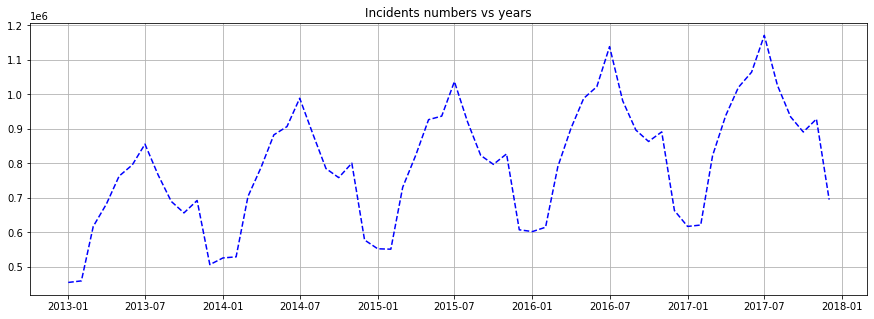

In [ ]:
timeserie_plot(total_sales.index.values,total_sales.values,[],[],'years',training=False)

In [ ]:
means_ytrain = total_sales.rolling(window=12,min_periods=1).mean().values
stds_ytrain  = total_sales.rolling(window=12,min_periods=1).std().values

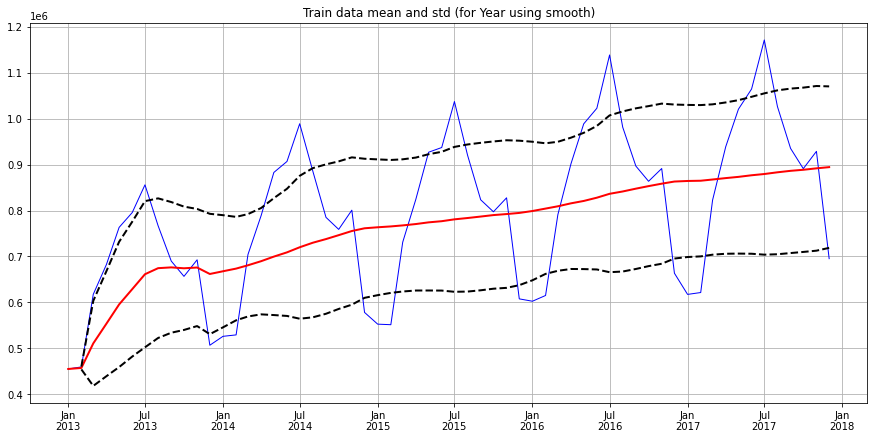

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)
t= total_sales.index.values
y= total_sales.values
ax.set_title('Train data mean and std (for Year using smooth)')
ax.plot(t,y,"b",lw=1)
ax.plot(t,means_ytrain,color='r',lw=2)
ax.plot(t,means_ytrain+stds_ytrain,color='k',lw=2,ls='--')
ax.plot(t,means_ytrain-stds_ytrain,color='k',lw=2,ls='--')
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1,7),interval=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
ax.grid()
plt.show()

### Revisión de herramientas gráficas

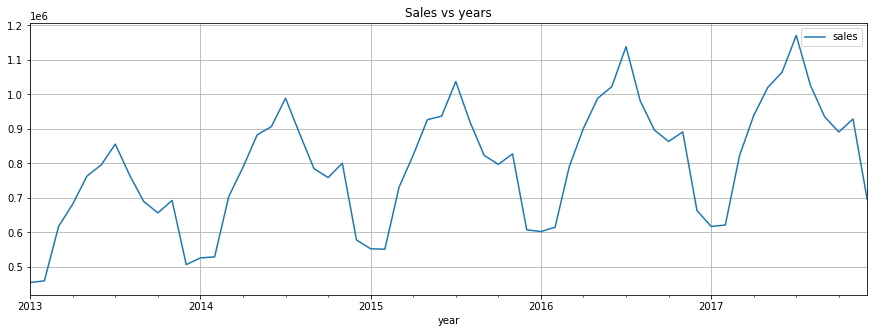

In [ ]:
total_sales.plot(figsize=(15,5),grid=True,title="Sales vs years",xlabel="year") 

In [ ]:
total_info =  df_train.groupby([df_train['date'].dt.year,df_train['date'].dt.month]).sum()
total_info.set_index(index,inplace=True)

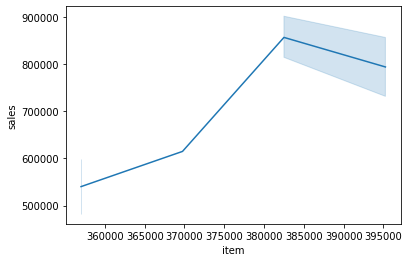

In [ ]:
import seaborn as sns

#Dataframe tip Serie de tiempo
#x=(index) y=(columna que vertical)
#hue --> agrupar 
#style --> diferentes tipos de línea
#size --> diferentes tipos de tamaños de línea 
sns.lineplot(data=total_info,x="item",y="sales")

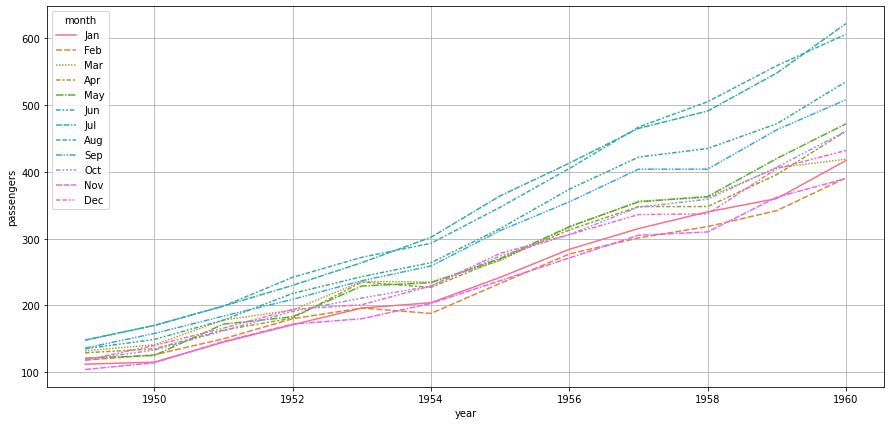

In [ ]:
flights = sns.load_dataset("flights")
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)
ax.grid()
sns.lineplot(data=flights, x="year", y="passengers",hue="month",style="month",ax=ax)

##UNIT ROOT

In [ ]:
!pip install arch

     |████████████████████████████████| 798kB 5.7MB/s 


In [ ]:
import arch

In [ ]:
adf(total_sales.values.ravel(),12)

*****************Result ADF test******************
ADF stats                -5.24752
p-value                7.0265e-06
Critical Values 1%      -3.574589
Critical Values 5%      -2.923954
Critical Values 10%     -2.600039
dtype: object
******************Analysis test*******************
The p-value of test has a significance level of less than 5%
We can reject $H_0$ with significance level of 1%
We can reject $H_0$ with significance level of 5%
We can reject $H_0$ with significance level of 10%



In [ ]:
from arch.unitroot import ADF
test_adf = ADF(total_sales.values)

In [ ]:
test_adf.summary()

Test Statistic,-5.248
P-value,0.000
Lags,11


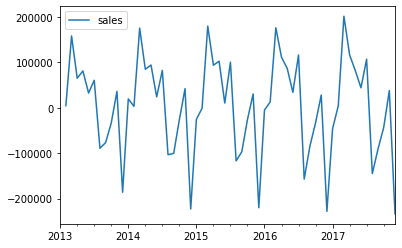

In [ ]:
#Primera la tendencia puede ser retirada con diff (primera diferencia)
total_sales.diff().plot)

In [ ]:
total_sales['diff-sales'] = total_sales.diff()

## Autocorrelation and Partial Autocorrelation

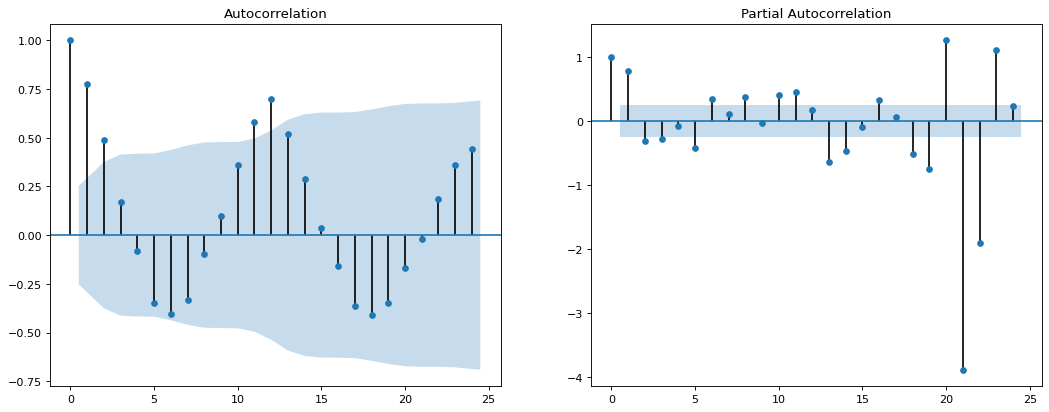

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(total_sales['sales'], ax=ax1, lags=24)
plot_pacf(total_sales['sales'], ax=ax2, lags=24)
plt.show()

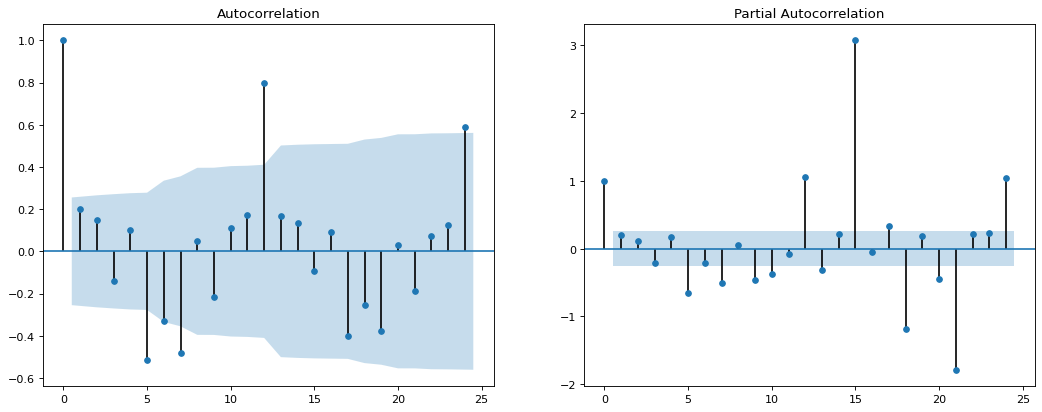

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(total_sales['diff-sales'].dropna(), ax=ax1, lags=24)
plot_pacf(total_sales['diff-sales'].dropna(), ax=ax2, lags=24)
plt.show()

## Trend

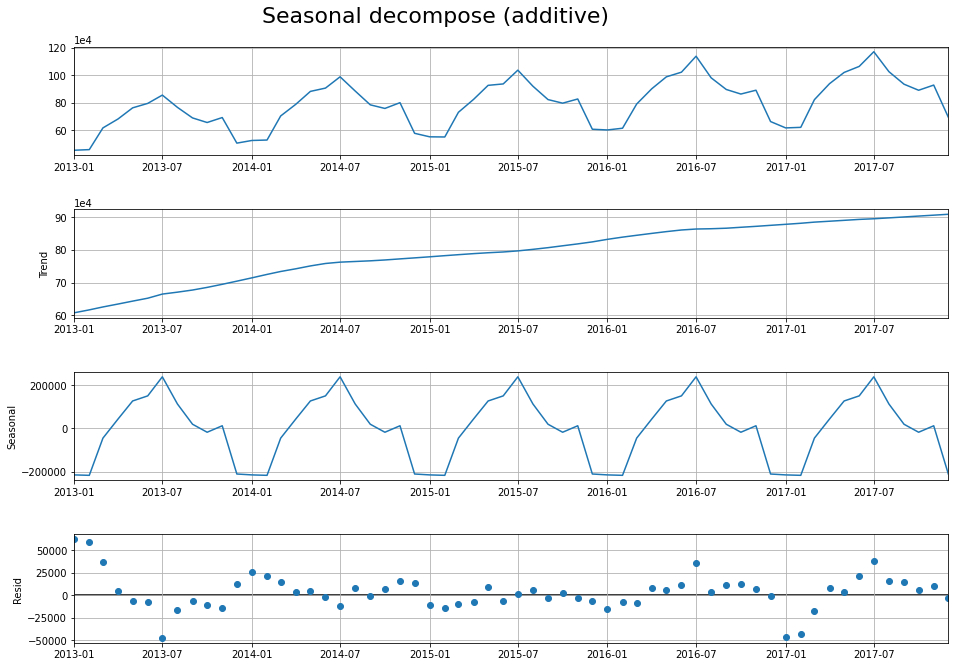

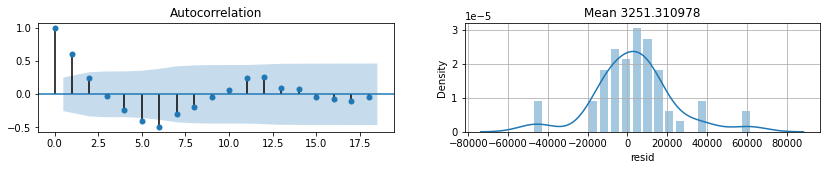

In [ ]:
SD_plots(total_sales[['sales']],12)

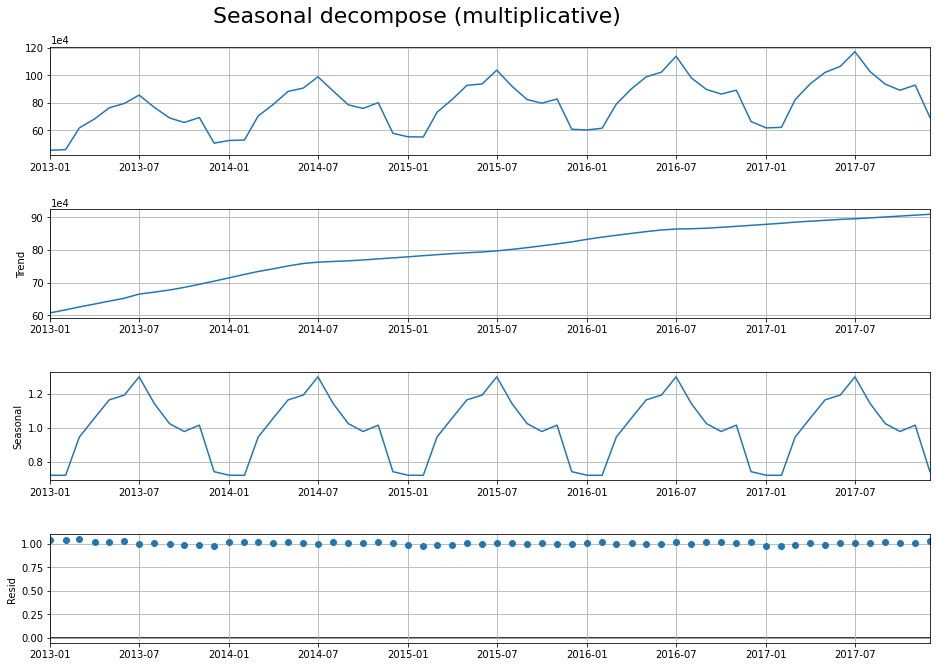

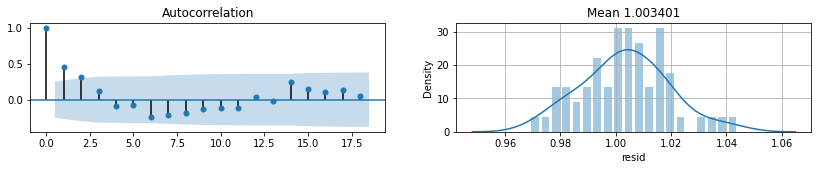

In [ ]:
res_mul = SD_plots(total_sales[['sales']],12,type_sd='multiplicative')

In [ ]:
dir(res_mul)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [ ]:
from statsmodels.api import OLS, add_constant
x, y = np.arange(len(res_mul.trend.dropna())), res_mul.trend.dropna()
x = add_constant(x)
model = OLS(y, x)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trend   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1509.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.21e-43
Time:                        00:42:34   Log-Likelihood:                -667.51
No. Observations:                  60   AIC:                             1339.
Df Residuals:                      58   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.492e+05   4258.501    152.437      0.000    6.41e+05    6.58e+05
x1          4836.3623    124.490     38.850      0.000    4587.169    5085.555
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.808
Skew:                          -0.591   Prob(JB):                        0.149
Kurtosis:                       2.645   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

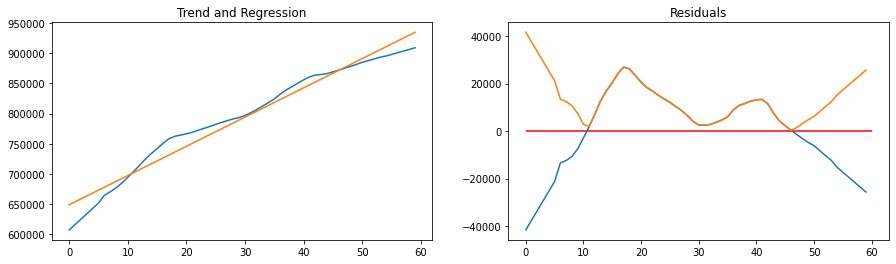

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,4));
ax[0].plot(res_mul.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(res_mul.trend.dropna()))])

ax[1].plot(res.resid.values)
ax[1].plot(np.abs(res.resid.values))
ax[1].hlines(0, 0, len(res.resid), color='r')

ax[0].set_title("Trend and Regression")
ax[1].set_title("Residuals")
plt.show()

In [ ]:
total_sales['detrend'] = total_sales['sales'] - res_mul.trend

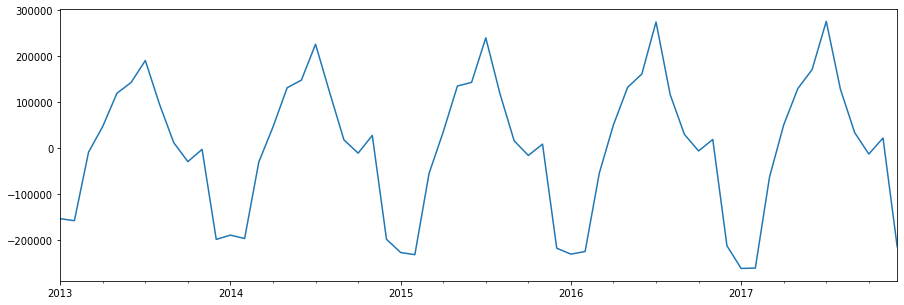

In [ ]:
total_sales['detrend'].plot(figsize=(15,5))

In [ ]:
stepwise_model = pm.auto_arima(total_sales['diff-sales'].dropna(), start_p=1, start_q=1, max_p=30, max_q=30, 
                                    start_P=0, seasonal=True, d=1, trace=False, error_action='ignore', stepwise=True)


In [ ]:
stepwise_model

ARIMA(maxiter=50, method='lbfgs', order=(6, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
stepwise_model_dtrend = pm.auto_arima(total_sales['detrend'], start_p=1, start_q=1, max_p=30, max_q=30, 
                                    start_P=0, seasonal=True, d=1, trace=False, error_action='ignore', stepwise=True)

In [ ]:
stepwise_model_dtrend

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
test = total_sales['diff-sales'][-7:]
forecas,interval = stepwise_model.predict(n_periods=60,return_conf_int=True)

In [ ]:
val_all = [0]*60
int_all = [0]*60
for index in range(60):
  val_all[index] = forecast[index] + total_sales['sales'][index]
  int_all[index] = interval[index] +  np.repeat(total_sales['sales'][index],2)
int_all = np.array(int_all)

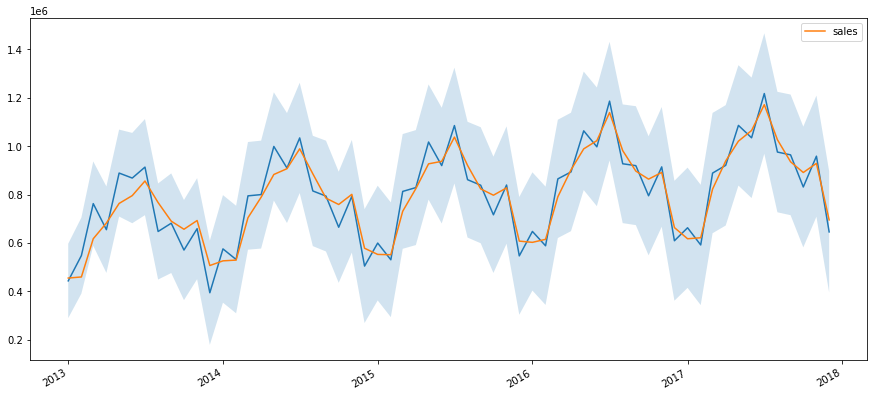

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax.grid()
ax.plot(total_sales.index.values,val_all)
total_sales.plot(y='sales', ax=ax)
ax.fill_between(total_sales.index.values,y1=int_all[:,0],y2=int_all[:,1],alpha=0.2)
#ax.plot(total_sales.index.values,)
#ax.plot(total_sales.index.values,int_all[:,1])

In [ ]:
from sklearn.metrics import median_absolute_error, mean_squared_error
print(metrics.smape(total_sales['sales'],val_all))
print(median_absolute_error(total_sales['sales'],val_all)*100/total_sales['sales'].mean())

6.7977670370271674
5.973837443300961


In [ ]:
forecas,interval = stepwise_model_dtrend.predict(n_periods=60,return_conf_int=True)

In [ ]:
val_all = [0]*60
int_all = [0]*60
for index in range(60):
  val_all[index] = forecast[index] + res_mul.trend.values[index]
  int_all[index] = interval[index] +  np.repeat(res_mul.trend.values[index],2)
int_all = np.array(int_all)

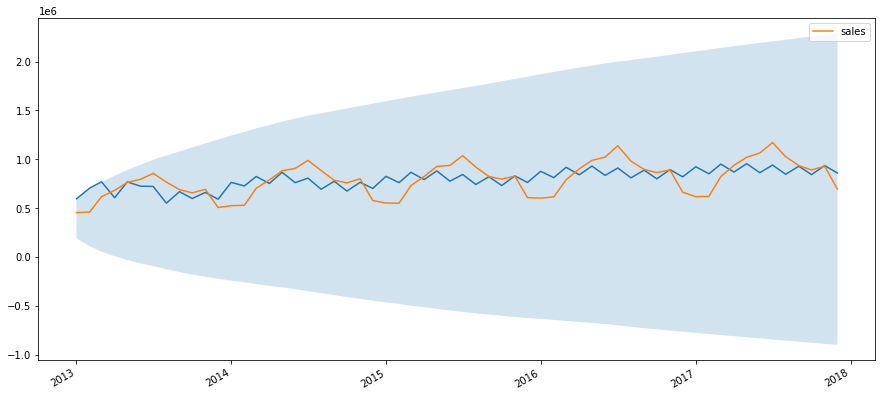

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax.grid()
ax.plot(total_sales.index.values,val_all)
total_sales.plot(y='sales', ax=ax)
ax.fill_between(total_sales.index.values,y1=int_all[:,0],y2=int_all[:,1],alpha=0.2)
#ax.plot(total_sales.index.values,)
#ax.plot(total_sales.index.values,int_all[:,1])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(total_sales['diff-sales'].dropna(),order=(6,1,3))
model.fit()

In [ ]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             diff-sales   No. Observations:                   59
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -726.416
Date:                Fri, 04 Dec 2020   AIC                           1472.831
Time:                        01:56:37   BIC                           1493.436
Sample:                    02-01-2013   HQIC                          1480.857
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1325      0.512      0.259      0.796      -0.871       1.136
ar.L2          0.2842      0.300      0.948      0.343      -0.303       0.872
ar.L3         -0.3013      0.283     -1.063      0.288      -0.857       0.254
ar.L4          0.3069      0.333      0.923      0.356      -0.345       0.959
ar.L5         -0.5393      0.242     -2.224      0.026      -1.014      -0.064
ar.L6         -0.3019      0.395     -0.764      0.445      -1.076       0.473
ma.L1         -0.9283      0.515     -1.802      0.072      -1.938       0.081
ma.L2         -0.8760      0.659     -1.329      0.184      -2.168       0.416
ma.L3          0.8584      0.398      2.154      0.031       0.077       1.639
sigma2      6.152e+09   8.59e-11   7.16e+19      0.000    6.15e+09    6.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.42   Prob(JB):                         0.42
Heteroskedasticity (H):               1.29   Skew:                            -0.13
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+36. Standard errors may be unstable.
"""

In [ ]:
forecast = model.fit().predict(0,59)


In [ ]:
val_all = [0]*60
int_all = [0]*60
for index in range(60):
  val_all[index] = forecast[index] + total_sales['sales'][index]

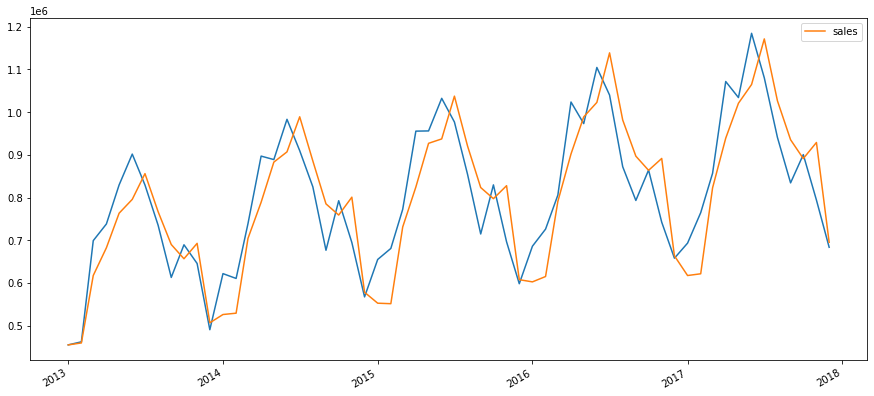

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
ax.grid()
ax.plot(total_sales.index.values,val_all)
total_sales.plot(y='sales', ax=ax)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing